<a href="https://colab.research.google.com/github/ORPHIC-SAGE/eso.tech/blob/main/Copy_of_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [84]:
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [86]:
print(X_train)

[[6.00e+00 1.54e+02 7.40e+01 ... 2.93e+01 8.39e-01 3.90e+01]
 [4.00e+00 8.30e+01 8.60e+01 ... 2.93e+01 3.17e-01 3.40e+01]
 [1.00e+00 9.70e+01 7.00e+01 ... 3.81e+01 2.18e-01 3.00e+01]
 ...
 [4.00e+00 9.40e+01 6.50e+01 ... 2.47e+01 1.48e-01 2.10e+01]
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [5.00e+00 1.36e+02 8.20e+01 ... 0.00e+00 6.40e-01 6.90e+01]]


In [87]:
print(X_test)

[[1.000e+00 1.990e+02 7.600e+01 4.300e+01 0.000e+00 4.290e+01 1.394e+00
  2.200e+01]
 [2.000e+00 1.070e+02 7.400e+01 3.000e+01 1.000e+02 3.360e+01 4.040e-01
  2.300e+01]
 [4.000e+00 7.600e+01 6.200e+01 0.000e+00 0.000e+00 3.400e+01 3.910e-01
  2.500e+01]
 [5.000e+00 1.660e+02 7.200e+01 1.900e+01 1.750e+02 2.580e+01 5.870e-01
  5.100e+01]
 [0.000e+00 1.110e+02 6.500e+01 0.000e+00 0.000e+00 2.460e+01 6.600e-01
  3.100e+01]
 [1.000e+00 8.100e+01 7.200e+01 1.800e+01 4.000e+01 2.660e+01 2.830e-01
  2.400e+01]
 [9.000e+00 1.520e+02 7.800e+01 3.400e+01 1.710e+02 3.420e+01 8.930e-01
  3.300e+01]
 [3.000e+00 1.760e+02 8.600e+01 2.700e+01 1.560e+02 3.330e+01 1.154e+00
  5.200e+01]
 [2.000e+00 1.270e+02 5.800e+01 2.400e+01 2.750e+02 2.770e+01 1.600e+00
  2.500e+01]
 [6.000e+00 1.030e+02 7.200e+01 3.200e+01 1.900e+02 3.770e+01 3.240e-01
  5.500e+01]
 [3.000e+00 1.580e+02 7.600e+01 3.600e+01 2.450e+02 3.160e+01 8.510e-01
  2.800e+01]
 [5.000e+00 1.870e+02 7.600e+01 2.700e+01 2.070e+02 4.360e+01 1.0

In [88]:
print(y_train)

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 1 1 0 1 0 0 0 0 1 1 

In [89]:
print(y_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0]


In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [91]:
print(X_train)

[[ 0.64073703  1.06850378  0.24780543 ... -0.3557498   1.13806722
   0.47594352]
 [ 0.04843029 -1.20025169  0.87103945 ... -0.3557498  -0.45291915
   0.05473838]
 [-0.84002981 -0.75289146  0.04006075 ...  0.76504362 -0.75465795
  -0.28222573]
 ...
 [ 0.04843029 -0.84875436 -0.2196201  ... -0.94161909 -0.96800861
  -1.04039498]
 [ 2.12150386 -1.13634308  0.24780543 ... -0.25385949 -0.50473289
   0.13897941]
 [ 0.34458366  0.49332633  0.66329478 ... -4.08748243  0.53154176
   3.00317435]]


In [92]:
print(y_train)

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 1 1 0 1 0 0 0 0 1 1 

In [93]:
print(X_test)

[[1.000e+00 1.990e+02 7.600e+01 4.300e+01 0.000e+00 4.290e+01 1.394e+00
  2.200e+01]
 [2.000e+00 1.070e+02 7.400e+01 3.000e+01 1.000e+02 3.360e+01 4.040e-01
  2.300e+01]
 [4.000e+00 7.600e+01 6.200e+01 0.000e+00 0.000e+00 3.400e+01 3.910e-01
  2.500e+01]
 [5.000e+00 1.660e+02 7.200e+01 1.900e+01 1.750e+02 2.580e+01 5.870e-01
  5.100e+01]
 [0.000e+00 1.110e+02 6.500e+01 0.000e+00 0.000e+00 2.460e+01 6.600e-01
  3.100e+01]
 [1.000e+00 8.100e+01 7.200e+01 1.800e+01 4.000e+01 2.660e+01 2.830e-01
  2.400e+01]
 [9.000e+00 1.520e+02 7.800e+01 3.400e+01 1.710e+02 3.420e+01 8.930e-01
  3.300e+01]
 [3.000e+00 1.760e+02 8.600e+01 2.700e+01 1.560e+02 3.330e+01 1.154e+00
  5.200e+01]
 [2.000e+00 1.270e+02 5.800e+01 2.400e+01 2.750e+02 2.770e+01 1.600e+00
  2.500e+01]
 [6.000e+00 1.030e+02 7.200e+01 3.200e+01 1.900e+02 3.770e+01 3.240e-01
  5.500e+01]
 [3.000e+00 1.580e+02 7.600e+01 3.600e+01 2.450e+02 3.160e+01 8.510e-01
  2.800e+01]
 [5.000e+00 1.870e+02 7.600e+01 2.700e+01 2.070e+02 4.360e+01 1.0

In [94]:
print(y_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0]


## Training the Logistic Regression model on the Training set

In [95]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [96]:
print(classifier.predict(sc.transform([[6,148,72,35,0,33.6,0.627,50]])))

[1]


## Predicting the Test set results

In [97]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]]


## Making the Confusion Matrix

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0 51]
 [ 0 26]]


0.33766233766233766

## Visualising the Training set results

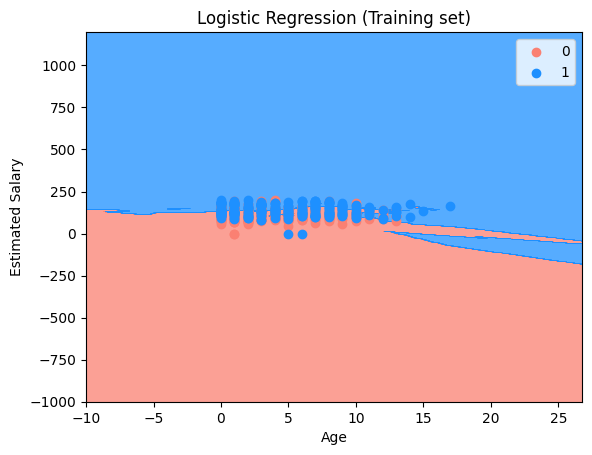

In [99]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train

# Calculate the mean of the features from the original training set (X_set)
# This will be used to fill the other feature dimensions for visualization
X_mean = X_set.mean(axis=0)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

# Create a dummy array with the correct number of features (8) for the scaler
# The first two features will be X1 and X2 from the meshgrid
# The remaining features will be filled with their respective means from the training data
X_grid_8_features = np.zeros((X1.size, X_set.shape[1]))
X_grid_8_features[:, 0] = X1.ravel()
X_grid_8_features[:, 1] = X2.ravel()
# Fill the remaining features with their means
for i in range(2, X_set.shape[1]):
    X_grid_8_features[:, i] = X_mean[i]

# Transform the 8-feature grid and then predict
plt.contourf(X1, X2, classifier.predict(sc.transform(X_grid_8_features)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

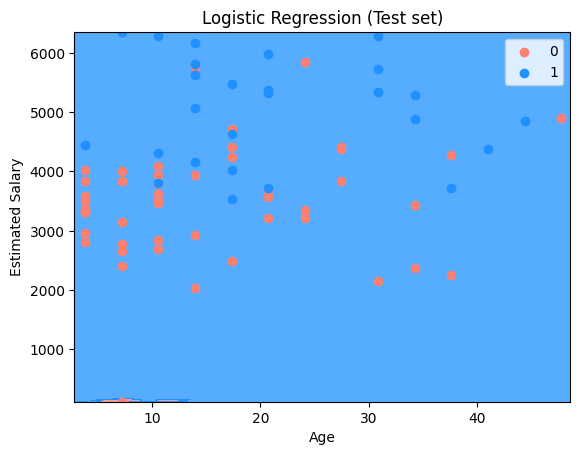

In [82]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
# Create a grid of points
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25)
)
# Create a dummy array with the correct number of features (8) for the scaler
# The first two features will be X1 and X2 from the meshgrid
# The remaining features will be filled with their respective means from the training data (X_mean)
X_grid_8_features_test = np.zeros((X1.size, X_set.shape[1]))
X_grid_8_features_test[:, 0] = X1.ravel()
X_grid_8_features_test[:, 1] = X2.ravel()
# Fill the remaining features with their means from X_mean (computed from training data)
for i in range(2, X_set.shape[1]):
    X_grid_8_features_test[:, i] = X_mean[i]
# Predict for each point on the grid after transforming with the scaler
Z = classifier.predict(sc.transform(X_grid_8_features_test)).reshape(X1.shape)
# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Define colors for scatter plot
colors = ['#FA8072', '#1E90FF']
# Plot the test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors[i], label=j
    )
# Add titles and labels
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()